In [ ]:
from numpy import load
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from google.colab import drive
import os

In [ ]:
drive.mount('/content/gdrive',force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Segmented Numpy Data/'
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


['.config', 'gdrive', 'sample_data']

In [ ]:
#prepare the data from the images we cut

data_output = np.zeros((1,6443008))
data_input = np.zeros((1,6443008)) 
all_files = sorted(os.listdir(base_dir))

for i in range(0,174):
    filename = all_files[i]
    if filename.endswith("seg.npz"): 
      dict_data1 = load(base_dir + filename)
      data_temp1 = dict_data1['arr_0']
      data_temp1 = data_temp1.reshape(1,6443008)
      data_output = np.vstack((data_output,data_temp1))
    else:
      dict_data2 = load(base_dir + filename)
      data_temp2 = dict_data2['arr_0']
      data_temp2 = data_temp2.reshape(1,6443008)
      data_input = np.vstack((data_input,data_temp2))

In [ ]:
data_output = np.delete(data_output,0, axis = 0)
data_input = np.delete(data_input,0,axis = 0)
print(data_output.shape)
print(data_input.shape)

(87, 6443008)
(87, 6443008)


In [ ]:
data_input2 = data_input.reshape(87,176,208,176)
data_output2 = data_output.reshape(87,176,208,176)
print(data_output2.shape)
print(data_input2.shape)

(87, 176, 208, 176)
(87, 176, 208, 176)


In [ ]:
#remove outliers
data_input2[data_input2 < 0] = 0
data_input2[data_input2 > 255] = 255

data_output2[data_output2 < 0] = 0
data_output2[data_output2 > 255] = 255

In [ ]:
#find the boundary of x, y, z axis in each image
index = np.zeros((87,6))

# x-axis
for i in range(0,87):
  for j in range(0,88):
    if (np.sum(data_output2[i,j,:,:])) > 0:
      if j > 0:
        index[i,0] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,k,:,:])) > 0:
      if k < 175:
        index[i,1] = k
        break

In [ ]:
# y-axis
for i in range(0,87):
  for j in range(0,104):
    if (np.sum(data_output2[i,:,j,:])) > 0:
      if j > 0:
        index[i,2] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,:,k,:])) > 0:
      if k < 175:
        index[i,3] = k
        break

In [ ]:
# z-axis
for i in range(0,87):
  for j in range(0,88):
    if (np.sum(data_output2[i,:,:,j])) > 0:
      if j > 0:
        index[i,4] = j
        break

for i in range(0,87):
  for k in range(175,88,-1):
    if (np.sum(data_output2[i,:,:,k])) > 0:
      if k < 175:
        index[i,5] = k
        break

In [ ]:
print(data_input2.shape)
print(data_output2.shape)

# The common boundaries are the following
# x-axis (42,121)
# y-axis (40,161)
# z-axis (32,134)

# Jimmy: We will adjust a few more or less pixels to fit a good
#        dimension shape (Y-axis -8, Z-axis +17) for the model
# Extract the part include ventricles
data_input_cut = data_input2[:,42:122,41:161,24:144]
data_output_cut = data_output2[:,42:122,41:161,24:144]
print(data_input_cut.shape)
print(data_output_cut.shape)
#Final Dimension should be 80, 120,120

(87, 176, 208, 176)
(87, 176, 208, 176)
(87, 80, 120, 120)
(87, 80, 120, 120)


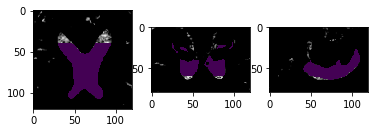

In [ ]:
# See the first image for example

f, ax = plt.subplots(1,3)

ax[0].imshow(data_input_cut[0,50,:,:],cmap="Greys")
ax[0].imshow(np.ma.masked_array(data_output_cut[0,50,:,:], data_output_cut[0,50,:,:]==0.0))

ax[1].imshow(data_input_cut[0,:,50,:],cmap="Greys")
ax[1].imshow(np.ma.masked_array(data_output_cut[0,:,50,:], data_output_cut[0,:,50,:]==0.0))

ax[2].imshow(data_input_cut[0,:,:,50],cmap="Greys")
ax[2].imshow(np.ma.masked_array(data_output_cut[0,:,:,50], data_output_cut[0,:,:,50]==0.0))

In [ ]:
X_dataset = data_input_cut
X_train = X_dataset[0:70,0:,0:,0:]
X_test = X_dataset[70:,0:,0:,0:]

Y_dataset = data_output_cut
Y_train = Y_dataset[0:70,0:,0:,0:]
Y_test = Y_dataset[70:,0:,0:,0:]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70, 80, 120, 120)
(17, 80, 120, 120)
(70, 80, 120, 120)
(17, 80, 120, 120)


In [ ]:
X_train = X_train.reshape(-1, 80,120,120, 1)
X_test = X_test.reshape(-1, 80,120,120,1)
Y_train = Y_train.reshape(-1,80,120,120, 1)
Y_test = Y_test.reshape(-1, 80,120,120, 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70, 80, 120, 120, 1)
(17, 80, 120, 120, 1)
(70, 80, 120, 120, 1)
(17, 80, 120, 120, 1)


In [ ]:
import keras
from keras import backend as K
from keras.layers.convolutional import Conv2D,Conv3D,Conv2DTranspose,MaxPooling3D,UpSampling3D
from keras.layers import Input, Dense, Activation,Dropout
from keras.layers import concatenate 
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [ ]:
input_size = (80,120,120,1)

inputs = Input(input_size)
conv1 = Conv3D(8, 7, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv3D(8, 7, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling3D(pool_size=(2, 2, 2))(drop3)

conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)

up5 = Conv3D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(drop4))
merge5 = concatenate([conv3,up5], axis = 4)
conv5 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge5)

up6 = Conv3D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv5))
merge6 = concatenate([conv2,up6], axis = 4)
conv6 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv3D(8, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (2,2,2))(conv6))
merge7 = concatenate([conv1,up7], axis = 4)
conv7 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv7 = Conv3D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv8 = Conv3D(1, 1, activation = 'sigmoid')(conv7)

model = Model(input = inputs, output = conv8)

model.compile(optimizer = Adam(lr = 1e-4), loss = "binary_crossentropy", metrics = ['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 120, 120, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 80, 120, 120, 2752        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 80, 120, 120, 21960       conv3d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling3d_1 (MaxPooling3D)  (None, 40, 60, 60, 8 0           conv3d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
epochs = 60
new_model = load_model('/content/gdrive/My Drive/model_001-3.1718.h5')
filepath = "/content/gdrive/My Drive/ml model/model_{epoch:03d}-{loss:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = new_model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=[checkpoint])

Train on 70 samples, validate on 17 samples
Epoch 1/60
70/70 [==============================] - 603s 9s/step - loss: 0.2461 - accuracy: 0.9623 - val_loss: 0.2277 - val_accuracy: 0.9662

Epoch 00001: saving model to /content/gdrive/My Drive/ml model/model_001-0.2461.h5
Epoch 2/60
70/70 [==============================] - 603s 9s/step - loss: 0.1987 - accuracy: 0.9669 - val_loss: 0.1904 - val_accuracy: 0.9688

Epoch 00002: saving model to /content/gdrive/My Drive/ml model/model_002-0.1987.h5
Epoch 3/60
70/70 [==============================] - 603s 9s/step - loss: 0.1682 - accuracy: 0.9692 - val_loss: 0.1705 - val_accuracy: 0.9698

Epoch 00003: saving model to /content/gdrive/My Drive/ml model/model_003-0.1682.h5
Epoch 4/60
70/70 [==============================] - 602s 9s/step - loss: 0.1499 - accuracy: 0.9705 - val_loss: 0.1254 - val_accuracy: 0.9759

Epoch 00004: saving model to /content/gdrive/My Drive/ml model/model_004-0.1499.h5
Epoch 5/60
70/70 [==============================] - 603s

KeyboardInterrupt: ignored

In [ ]:
epochs = 60
new_model = load_model('/content/gdrive/My Drive/ml model/model_041-0.1031.h5')
filepath = "/content/gdrive/My Drive/ml model/model_{epoch:03d}-{loss:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]
history = new_model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_test, Y_test),callbacks=[checkpoint])

Train on 70 samples, validate on 17 samples
Epoch 1/60
70/70 [==============================] - 619s 9s/step - loss: 0.1004 - accuracy: 0.9729 - val_loss: 0.0768 - val_accuracy: 0.9790

Epoch 00001: saving model to /content/gdrive/My Drive/ml model/model_001-0.1004.h5
Epoch 2/60
70/70 [==============================] - 611s 9s/step - loss: 0.0986 - accuracy: 0.9728 - val_loss: 0.0896 - val_accuracy: 0.9791

Epoch 00002: saving model to /content/gdrive/My Drive/ml model/model_002-0.0986.h5
Epoch 3/60
70/70 [==============================] - 614s 9s/step - loss: 0.1110 - accuracy: 0.9719 - val_loss: 0.0785 - val_accuracy: 0.9791

Epoch 00003: saving model to /content/gdrive/My Drive/ml model/model_003-0.1110.h5
Epoch 4/60
70/70 [==============================] - 612s 9s/step - loss: 0.1227 - accuracy: 0.9719 - val_loss: 0.1182 - val_accuracy: 0.9786

Epoch 00004: saving model to /content/gdrive/My Drive/ml model/model_004-0.1227.h5
Epoch 5/60
70/70 [==============================] - 612s

In [ ]:
from google.colab import files
files.download("/content/gdrive/My Drive/model_001-3.1718.h5")

In [ ]:
epochs = 40
filepath = "model_039-0.0731.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
callbacks_list = [checkpoint]

In [ ]:
Model("model_040-0.0645.h5").save('model_040-0.0645.h5')

NotImplementedError: ignored